**See the pdf report here**
[github link to the work and report](https://github.com/Christophe-Saury/School_Work/tree/main/Intro_to_machine_learning_course/Final%20Project%20-%20IML)




In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_20newsgroups

In [11]:
class TextCategorizer:
    def __init__(self, categories=None):
        self.target_categories = categories
        self.unique_words_set = set()
        self.unique_words_list = []
        self.category_info = {}

    def construct_vocabulary(self, data):
        for document in data:
            words = document.lower().split()
            self.unique_words_set.update(words)
        self.unique_words_list = list(self.unique_words_set)

    def train_model(self, train_data, train_target):
        self.category_info = {category: {"word_count": {word: 0 for word in self.unique_words_list}, "log_prob": {key: 0 for key in self.unique_words_list}} for category in self.target_categories}

        for category in self.target_categories:
            self.update_category_information(train_data, train_target, category)
            self.compute_log_probabilities(category)

    def update_category_information(self, train_data, train_target, category):
        data_for_category = [train_data[i] for i in range(len(train_data)) if train_target[i] == self.target_categories.index(category)]
        word_count_category = {word: 0 for word in self.unique_words_list}
        total_words = 0

        for document in data_for_category:
            words = set(document.lower().split())
            for word in words:
                total_words += 1
                word_count_category[word] += 1

        for word in word_count_category:
            word_count_category[word] += 1

        total_words_with_smoothing = len(self.unique_words_list) + total_words
        for word in word_count_category:
            self.category_info[category]["word_count"][word] = word_count_category[word] / total_words_with_smoothing

    def compute_log_probabilities(self, category):
        self.category_info[category]["log_prob"] = {word: np.log(prob) for word, prob in self.category_info[category]["word_count"].items()}

    def make_predictions(self, test_data):
        predicted_labels = []
        true_labels = []

        for i, sample in enumerate(test_data):
            log_probabilities = self.compute_log_probs_for_sample(sample)

            predicted_label, true_label = self.extract_labels(log_probabilities, i)

            predicted_labels.append(predicted_label)
            true_labels.append(true_label)

            # Print individual predictions
            print(f"Sample {i + 1} - Predicted: {predicted_label}, True: {true_label}")

        return true_labels, predicted_labels

    def compute_accuracy(self, true_labels, predicted_labels):
        correct_predictions = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
        total_samples = len(true_labels)
        accuracy = correct_predictions / total_samples
        return accuracy * 100

    def compute_log_probs_for_sample(self, sample):
        return {
            category: sum(self.category_info[category]["log_prob"].get(word, 0) for word in set(sample.lower().split()))
            for category in self.target_categories
        }

    def extract_labels(self, log_probabilities, i):
        predicted_index = np.argmax(list(log_probabilities.values()))
        predicted_label = self.target_categories[predicted_index]
        true_label = test.target_names[test.target[i]]
        return predicted_label, true_label

    def visualize_confusion_matrix(self, true_labels, predicted_labels):
        confusion_mat = confusion_matrix(true_labels, predicted_labels, labels=self.target_categories)
        plt.figure(figsize=(10, 8))
        sns.set(font_scale=1.2)
        sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=self.target_categories, yticklabels=self.target_categories)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()


In [12]:
# Train the model:
data = fetch_20newsgroups()
target_categories = data.target_names
train_data = fetch_20newsgroups(subset='train', categories=target_categories)
test_data = fetch_20newsgroups(subset='test', categories=target_categories)

text_categorizer = TextCategorizer(categories=target_categories)
text_categorizer.construct_vocabulary(train_data.data)
text_categorizer.train_model(train_data.data, train_data.target)


In [13]:
# Make Predictions
true_labels, predicted_labels = text_categorizer.make_predictions(test_data.data)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Sample 2534 - Predicted: comp.windows.x, True: comp.windows.x
Sample 2535 - Predicted: soc.religion.christian, True: talk.politics.misc
Sample 2536 - Predicted: soc.religion.christian, True: alt.atheism
Sample 2537 - Predicted: soc.religion.christian, True: soc.religion.christian
Sample 2538 - Predicted: sci.med, True: sci.med
Sample 2539 - Predicted: soc.religion.christian, True: soc.religion.christian
Sample 2540 - Predicted: soc.religion.christian, True: soc.religion.christian
Sample 2541 - Predicted: rec.autos, True: rec.autos
Sample 2542 - Predicted: rec.autos, True: rec.autos
Sample 2543 - Predicted: comp.windows.x, True: comp.windows.x
Sample 2544 - Predicted: talk.politics.guns, True: talk.politics.guns
Sample 2545 - Predicted: misc.forsale, True: misc.forsale
Sample 2546 - Predicted: talk.politics.mideast, True: talk.politics.mideast
Sample 2547 - Predicted: rec.sport.baseball, True: rec.sport.baseba

In [14]:
# Compute and Print Accuracy
accuracy = text_categorizer.compute_accuracy(true_labels, predicted_labels)
print("Test Accuracy(%):", accuracy)

Test Accuracy(%): 76.28783855549655


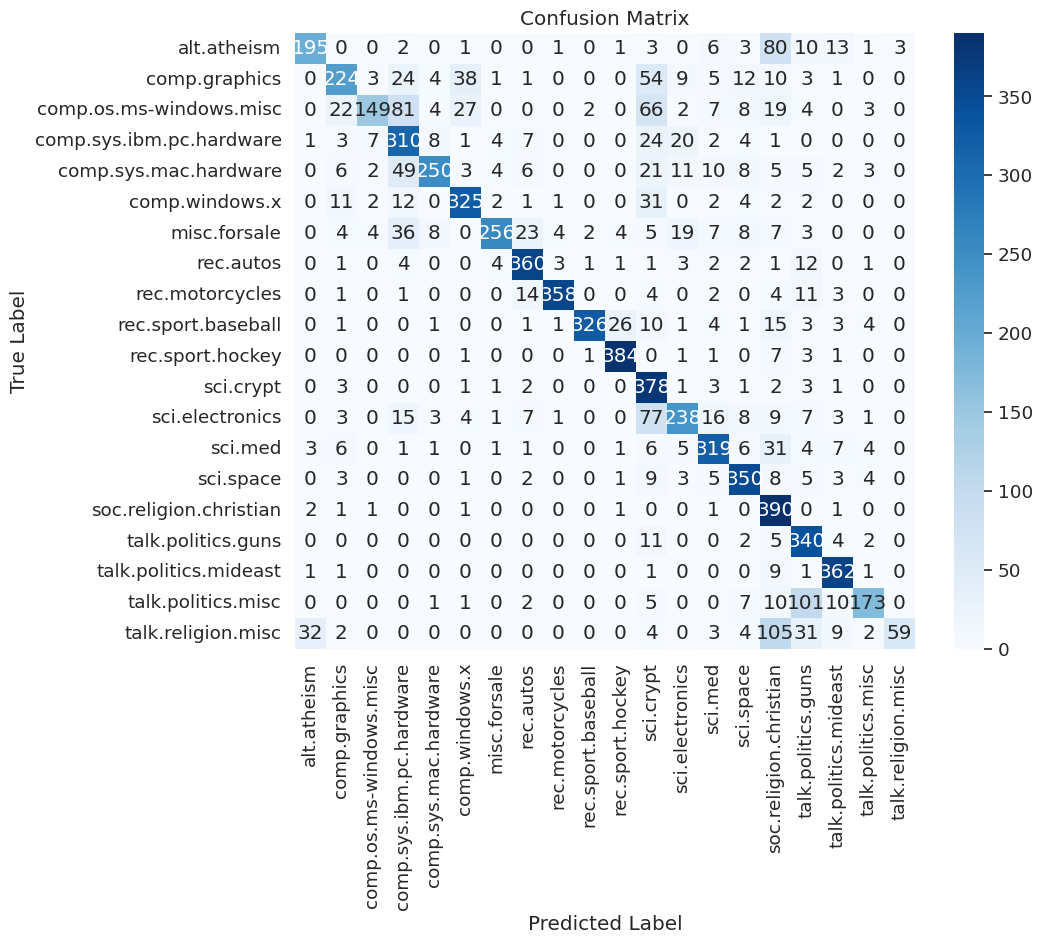

In [15]:
# Visualize Confusion Matrix
text_categorizer.visualize_confusion_matrix(true_labels, predicted_labels)